In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from scipy.stats import norm

# ZOSTAW DO MOMENTU...

WOŁOWINA

In [77]:
beef_path = 'BEEF.csv'

beef_df = pd.read_csv(beef_path)

print(beef_df.head())

                        Date  Open  High   Low  Close    Volume  Dividends   
0  2024-04-04 00:00:00-03:00  6.77  6.82  6.69   6.71  11698300        0.0  \
1  2024-04-05 00:00:00-03:00  6.71  6.76  6.55   6.62   8445700        0.0   
2  2024-04-08 00:00:00-03:00  6.65  6.66  6.57   6.60   7657500        0.0   
3  2024-04-09 00:00:00-03:00  6.60  6.72  6.52   6.56   9762700        0.0   
4  2024-04-10 00:00:00-03:00  6.52  6.57  6.42   6.46  12493000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [78]:
beef_data = beef_df['Close']
logret_beef_data =  np.log(beef_data / beef_data.shift(1))

CEBULA

In [79]:
onion_path = 'ONION.csv'

onion_df = pd.read_csv(onion_path)

print(onion_df.head())

                        Date      Open      High       Low     Close  Volume   
0  2024-04-05 00:00:00+00:00  0.060301  0.060412  0.058137  0.059733       0  \
1  2024-04-06 00:00:00+00:00  0.059733  0.061251  0.059417  0.060663       0   
2  2024-04-07 00:00:00+00:00  0.060663  0.061815  0.060606  0.061056       0   
3  2024-04-08 00:00:00+00:00  0.061056  0.063966  0.060853  0.063054       0   
4  2024-04-09 00:00:00+00:00  0.063054  0.063127  0.060145  0.060853       0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [80]:
onion_data = onion_df['Close']
logret_onion_data =  np.log(onion_data / onion_data.shift(1))

POMIDOR

In [81]:
tomato_path = 'TOMATO.csv'

tomato_df = pd.read_csv(tomato_path)

print(tomato_df.head())

                        Date         Open         High          Low   
0  2024-04-04 00:00:00+09:00  1183.058238  1190.727983  1171.553620  \
1  2024-04-05 00:00:00+09:00  1177.305842  1184.016869  1167.718661   
2  2024-04-08 00:00:00+09:00  1177.305830  1185.934293  1175.388394   
3  2024-04-09 00:00:00+09:00  1179.223322  1180.182041  1172.512295   
4  2024-04-10 00:00:00+09:00  1176.347202  1179.223356  1171.553611   

         Close  Volume  Dividends  Stock Splits  
0  1188.810547   19800        0.0           0.0  
1  1174.429688   20200        0.0           0.0  
2  1179.223267   13700        0.0           0.0  
3  1176.347168   13800        0.0           0.0  
4  1172.512329   13400        0.0           0.0  


In [82]:
tomato_data = tomato_df['Close']
logret_tomato_data =  np.log(tomato_data / tomato_data.shift(1))

PALIWO

In [83]:
import pandas as pd

# Wczytanie danych z pliku, bez nagłówków
fuel_path = 'fuel.csv'
fuel_df = pd.read_csv(fuel_path, header=None)

# Dostosowanie nagłówków do liczby kolumn
if fuel_df.shape[1] == 6:
    fuel_df.columns = ['Date', 'Price', 'Close', 'High', 'Low', 'Open']
elif fuel_df.shape[1] == 7:
    fuel_df.columns = ['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume']

# Usunięcie pierwszych dwóch wierszy, które zawierają nieprawidłowe dane
fuel_df = fuel_df.drop([0, 1])

# Usunięcie pierwszego wiersza w każdej kolumnie, który zawiera błędne dane
fuel_df = fuel_df.iloc[1:].reset_index(drop=True)

# Konwersja kolumny 'Date' na typ datetime
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])

# Sortowanie danych po dacie w odwrotnej kolejności (od najnowszej do najstarszej)
fuel_df = fuel_df.sort_values(by='Date', ascending=False).reset_index(drop=True)

# Sprawdzanie wyników
print(fuel_df.head())


        Date               Price               Close                High   
0 2025-04-04   2.054500102996826   2.159899950027466   2.006500005722046  \
1 2025-04-03   2.164299964904785   2.302500009536743   2.139699935913086   
2 2025-04-02  2.3310000896453857  2.3447000980377197  2.2934999465942383   
3 2025-04-01   2.302500009536743   2.311199903488159   2.281100034713745   
4 2025-03-31   2.283099889755249   2.286099910736084   2.232800006866455   

                  Low    Open  
0  2.1528000831604004   78450  
1   2.302500009536743  103855  
2  2.3018999099731445   82128  
3  2.2880001068115234   70882  
4  2.2346999645233154   65925  


In [84]:
# Konwersja kolumny 'Date' na typ datetime (jeśli jeszcze nie była)
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])

# Sortowanie danych po dacie malejąco
fuel_df = fuel_df.sort_values(by='Date', ascending=False).reset_index(drop=True)

# Sprawdzenie braków przed interpolacją
print("Braki przed interpolacją:\n", fuel_df.isna().sum())

# Interpolacja tylko na kolumnach liczbowych
numeric_cols = fuel_df.select_dtypes(include='number').columns
fuel_df[numeric_cols] = fuel_df[numeric_cols].interpolate(method='linear', limit_direction='forward', axis=0)

# Ucięcie lub dopasowanie do dokładnie 252 wierszy
fuel_df = fuel_df.head(252).reset_index(drop=True)

# Sprawdzenie braków po interpolacji
print("Braki po interpolacji:\n", fuel_df.isna().sum())
print(f"Liczba wierszy po obróbce: {len(fuel_df)}")


Braki przed interpolacją:
 Date     0
Price    0
Close    0
High     0
Low      0
Open     0
dtype: int64
Braki po interpolacji:
 Date     0
Price    0
Close    0
High     0
Low      0
Open     0
dtype: int64
Liczba wierszy po obróbce: 252


In [85]:
print(fuel_df.columns)


Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open'], dtype='object')


# TEGO NIE PUSZCZAMY

In [86]:
# Zostaw tylko Date i fuel_data, zmień nazwę kolumny
fuel_df = fuel_df[['Date', 'fuel_data']]

# Konwersja na float (ważne!)
fuel_df['fuel_data'] = pd.to_numeric(fuel_df['fuel_data'], errors='coerce')

# Stworzenie ramki z datami
main_dates = pd.DataFrame({'Date': fuel_df['Date']})

# Dołączenie danych fuel
merged = main_dates.merge(fuel_df, on='Date', how='left')

# Interpolacja brakujących danych
merged['fuel_data'] = merged['fuel_data'].interpolate(method='linear')

# Obliczenie logarytmicznej stopy zwrotu
merged['logret_fuel_data'] = np.log(merged['fuel_data'] / merged['fuel_data'].shift(1))

# Zapis do pliku CSV z separatorem średnikowym
merged.to_csv('fuel_output.csv', index=False, sep=';')

print("Zapisano plik 'fuel_output.csv'.")


KeyError: "['fuel_data'] not in index"

In [ ]:
# Konwersja 'Date' na datetime
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])

# Wyodrębnij kolumny do zmiennych
dates = fuel_df['Date']
fuel_data = fuel_df['fuel_data']

# Oblicz logarytmiczną stopę zwrotu, jeśli jeszcze nie została obliczona
if 'logret_fuel_data' not in fuel_df.columns:
    fuel_df['logret_fuel_data'] = np.log(fuel_df['fuel_data'] / fuel_df['fuel_data'].shift(1))

logret_fuel_data = fuel_df['logret_fuel_data']

# Wydrukuj długości
print(len(dates), len(fuel_data), len(logret_fuel_data))


KeyError: 'fuel_data'

In [87]:
import pandas as pd
import numpy as np

# Usuń informacje o strefach czasowych
beef_df['Date'] = pd.to_datetime(beef_df['Date']).dt.tz_localize(None)
onion_df['Date'] = pd.to_datetime(onion_df['Date']).dt.tz_localize(None)
tomato_df['Date'] = pd.to_datetime(tomato_df['Date']).dt.tz_localize(None)

# Zostaw tylko potrzebne kolumny
beef_df = beef_df[['Date', 'Close']].rename(columns={'Close': 'beef_data'})
onion_df = onion_df[['Date', 'Close']].rename(columns={'Close': 'onion_data'})
tomato_df = tomato_df[['Date', 'Close']].rename(columns={'Close': 'tomato_data'})

# Zakres dat z beef_df
main_dates = pd.DataFrame({'Date': beef_df['Date']})

# Dołącz dane onion i tomato
merged = main_dates.merge(beef_df, on='Date', how='left') \
                   .merge(onion_df, on='Date', how='left') \
                   .merge(tomato_df, on='Date', how='left')

# Interpolacja braków
merged['beef_data'] = merged['beef_data'].interpolate(method='linear')
merged['onion_data'] = merged['onion_data'].interpolate(method='linear')
merged['tomato_data'] = merged['tomato_data'].interpolate(method='linear')

# Obliczenie logretów
merged['logret_beef_data'] = np.log(merged['beef_data'] / merged['beef_data'].shift(1))
merged['logret_onion_data'] = np.log(merged['onion_data'] / merged['onion_data'].shift(1))
merged['logret_tomato_data'] = np.log(merged['tomato_data'] / merged['tomato_data'].shift(1))

# Zapis do CSV z separatorem średnikowym
merged.to_csv('merged_output.csv', index=False, sep=';')

print("Zapisano plik 'merged_output.csv'.")


Zapisano plik 'merged_output.csv'.


# MOMENT

In [3]:
# Wczytaj plik
df = pd.read_csv('merged_output.csv', sep=';')

# Wyodrębnij kolumny do zmiennych
dates = pd.to_datetime(df['Date'])

beef_data = df['beef_data']
logret_beef_data = df['logret_beef_data']

onion_data = df['onion_data']
logret_onion_data = df['logret_onion_data']

tomato_data = df['tomato_data']
logret_tomato_data = df['logret_tomato_data']

In [4]:
print(len(beef_data),len( onion_data),len( tomato_data))

252 252 252


WYKRES CEN

WYKRES CEN

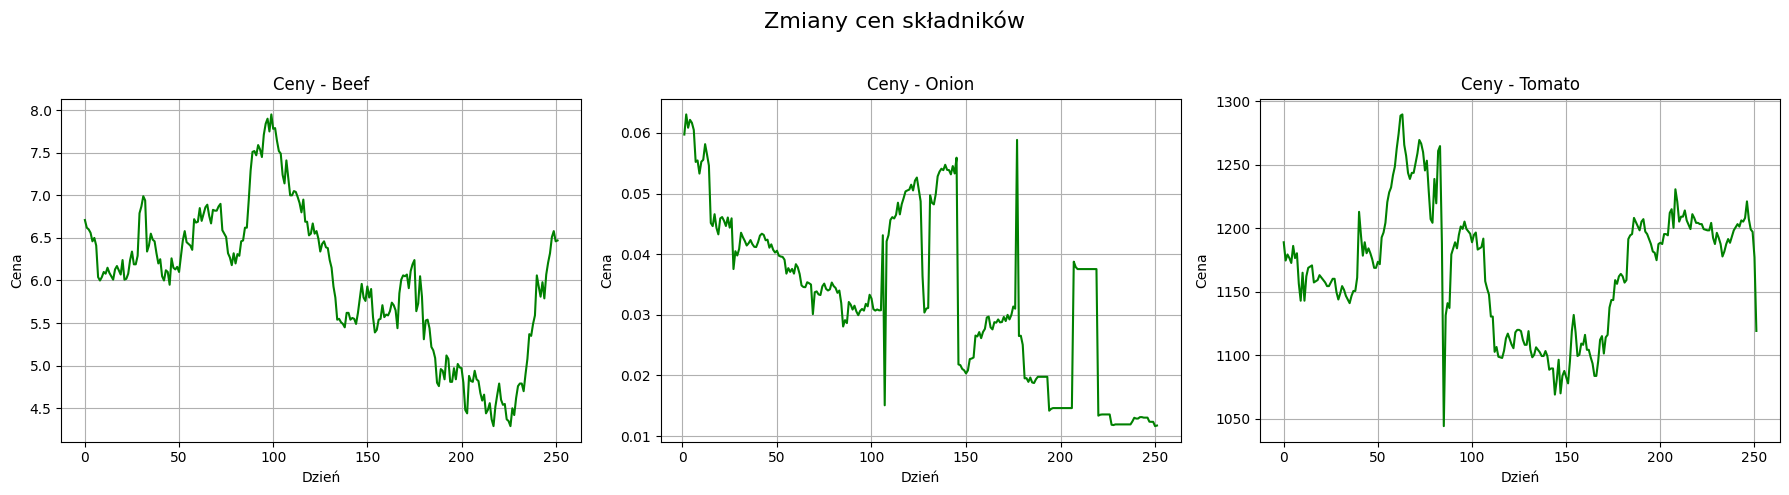

In [5]:
def plot_price_series(price_dict):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

    for ax, (name, series) in zip(axes, price_dict.items()):
        ax.plot(series.index, series.values, color='green')
        ax.set_title(f"Ceny - {name}")
        ax.set_xlabel("Dzień")
        ax.set_ylabel("Cena")
        ax.grid(True)

    plt.suptitle("Zmiany cen składników", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

price_data = {
    'Beef': beef_data,
    'Onion': onion_data,
    'Tomato': tomato_data
}

plot_price_series(price_data)


Cena wołowiny wykazuje dużą zmienność — od około 4.5 do 8.0 jednostek, z wyraźnym szczytem w połowie roku.
Takie wahania mają bezpośredni wpływ na koszty produkcji burgerów i innych produktów mięsnych, które są głównym składnikiem oferty McDonald's.
Ryzyko cenowe: wysokie, ze względu na sezonowe wzrosty (prawdopodobnie lato/grill) i gwałtowne spadki.
Możliwe skutki: Potrzeba zabezpieczenia cen (hedging), Ryzyko spadku marż zysku, możliwa konieczność dostosowywania cen produktów dla klientów.

Ceny cebuli są niskie, ale niestabilne – pojawiają się nagłe spadki do niemal zera oraz skoki.
Takie anomalie mogą wynikać z: Sezonowości,Problemów z dostępnością (np. susze, nieurodzaj).
Ryzyko operacyjne: średnie – cebula nie jest głównym składnikiem, ale jej brak lub nagły wzrost cen może wpłynąć na jakość produktów i koszty dodatków. McDonald's musi reagować np. zmieniając proporcje składników lub poszukując alternatywnych dostawców.

Ceny pomidorów również są bardzo zmienne, z gwałtownymi spadkami w kilku momentach. Duże wahania mogą być spowodowane sezonowością i problemami z uprawą. Pomidor to częsty składnik burgerów i sałatek — jego cena wpływa na jakość i dostępność świeżych produktów.
Ryzyko jakościowe i wizerunkowe: jeśli produkt musi być usunięty z oferty z powodu braku surowca lub jego niskiej jakości.

In [6]:
petrol=pd.read_csv("fuel_output.csv",sep=";")
print(petrol.head())

         Date  fuel_data  logret_fuel_data
0  2025-04-04     2.1599               NaN
1  2025-04-03     2.3025          0.063934
2  2025-04-02     2.3447          0.018162
3  2025-04-01     2.3112         -0.014391
4  2025-03-31     2.2861         -0.010920


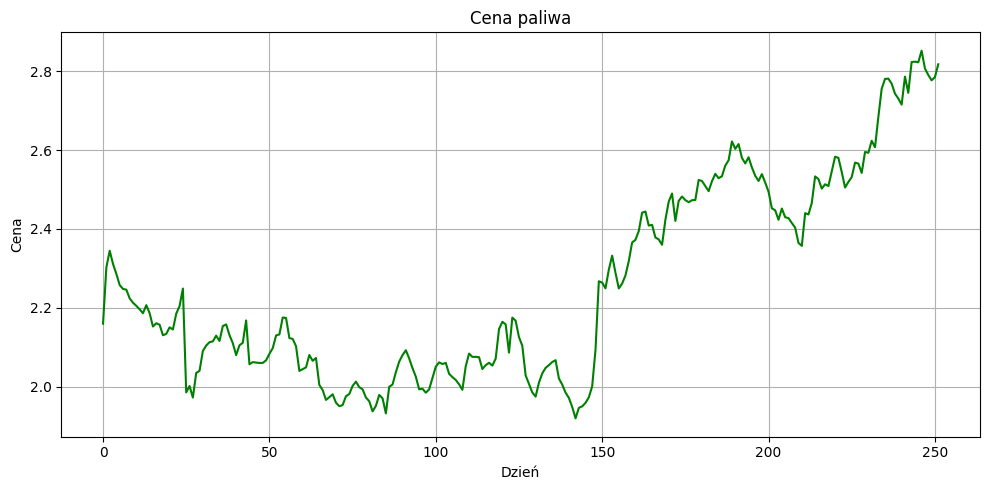

In [7]:
fuel_df = pd.read_csv("fuel_output.csv",sep=";")
dates = fuel_df['Date']
fuel_data = fuel_df['fuel_data']

# Oblicz logarytmiczną stopę zwrotu, jeśli jeszcze nie została obliczona


logret_fuel_data = fuel_df['logret_fuel_data']

def plot_single_price_series(series, title="Cena paliwa"):
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, color='green')
    plt.title(title)
    plt.xlabel("Dzień")
    plt.ylabel("Cena")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_single_price_series(fuel_data)

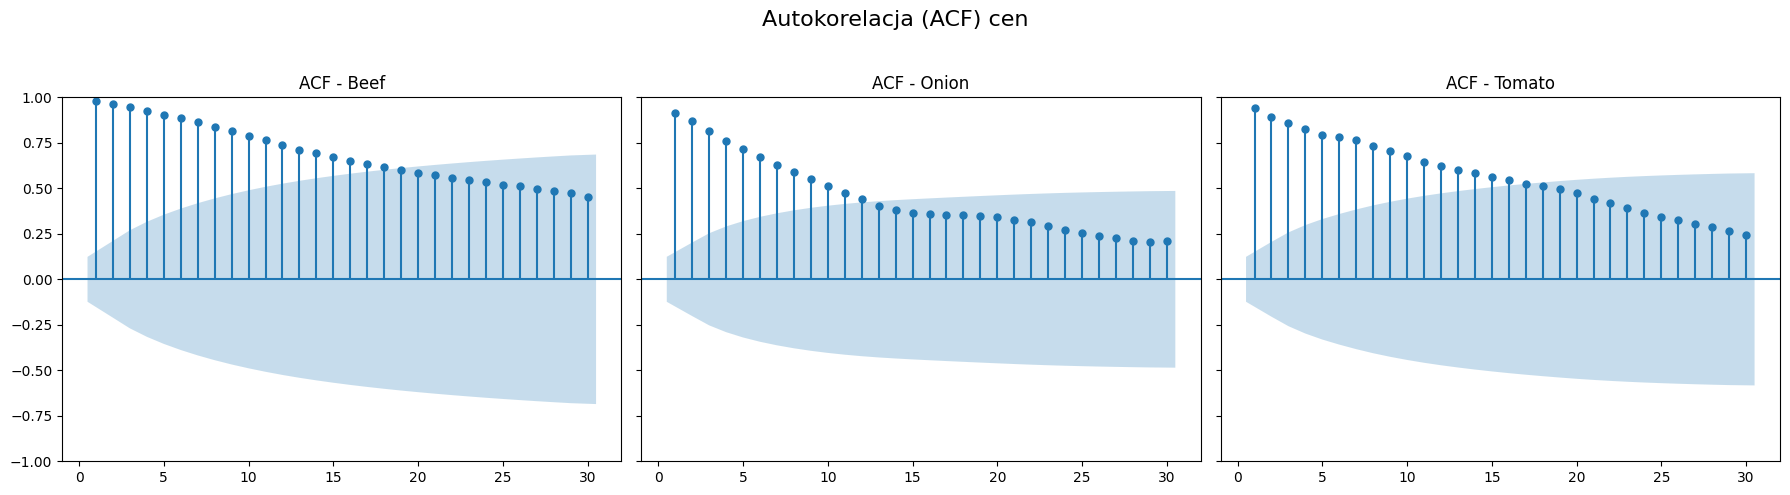

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_acf(beef_data.dropna(), ax=axes[0], lags=30, title='ACF - Beef', zero=False)
plot_acf(onion_data.dropna(), ax=axes[1], lags=30, title='ACF - Onion', zero=False)
plot_acf(tomato_data.dropna(), ax=axes[2], lags=30, title='ACF - Tomato', zero=False)

plt.suptitle("Autokorelacja (ACF) cen", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

1. Wołowina:
Wysokie autokorelacje dla wielu lagów. Wskazuje to, że cena wołowiny wykazuje dużą zależność od swojej przeszłości – czyli zmienia się powoli i przewidywalnie.

 plus: łatwiejsze planowanie zakupów i zawierania kontraktów.
 minus: jeśli cena idzie w górę, prawdopodobnie utrzyma się wysoka, co zwiększa koszty.

2. Cebula
Również widoczna istotna autokorelacja przy niższych lagach, ale potem szybko maleje.
Oznacza to pewną krótkoterminową pamięć, ale brak silnych długoterminowych zależności.

Ceny mogą być podatne na krótkie, lokalne zaburzenia (np. sezonowość, pogoda), ale nie mają silnych trendów.

plus: Mniejsze ryzyko długotrwałych wysokich cen.

minus: Trudniej przewidzieć skoki – większa potrzeba elastyczności.

3. Pomidor
Bardzo podobna struktura jak wołowina – dość długotrwała i silna autokorelacja.
Wskazuje na dużą inercję cen – podobnie jak w przypadku wołowiny.

plus: Można przewidywać zmiany z pewnym wyprzedzeniem.

minus: Niewygodny scenariusz, jeśli ceny idą w górę – efekt „ciągnięcia w czasie”.

Ceny składników nie są losowe – mają strukturę czasową!

Szczególnie wołowina i pomidor wykazują silną autokorelację → warto to wykorzystać przy planowaniu zakupów lub strategii hedgingowej.


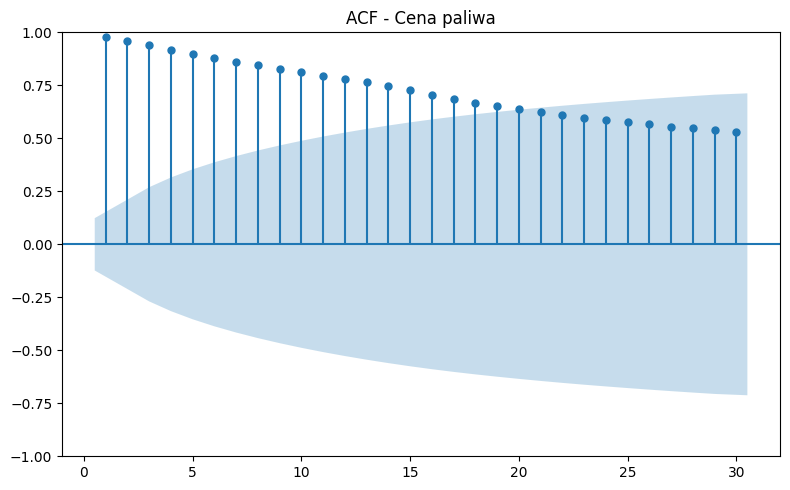

In [9]:

fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(fuel_data.dropna(), ax=ax, lags=30, title="ACF - Cena paliwa", zero=False)

plt.tight_layout()
plt.show()

WYKRES LOGRET

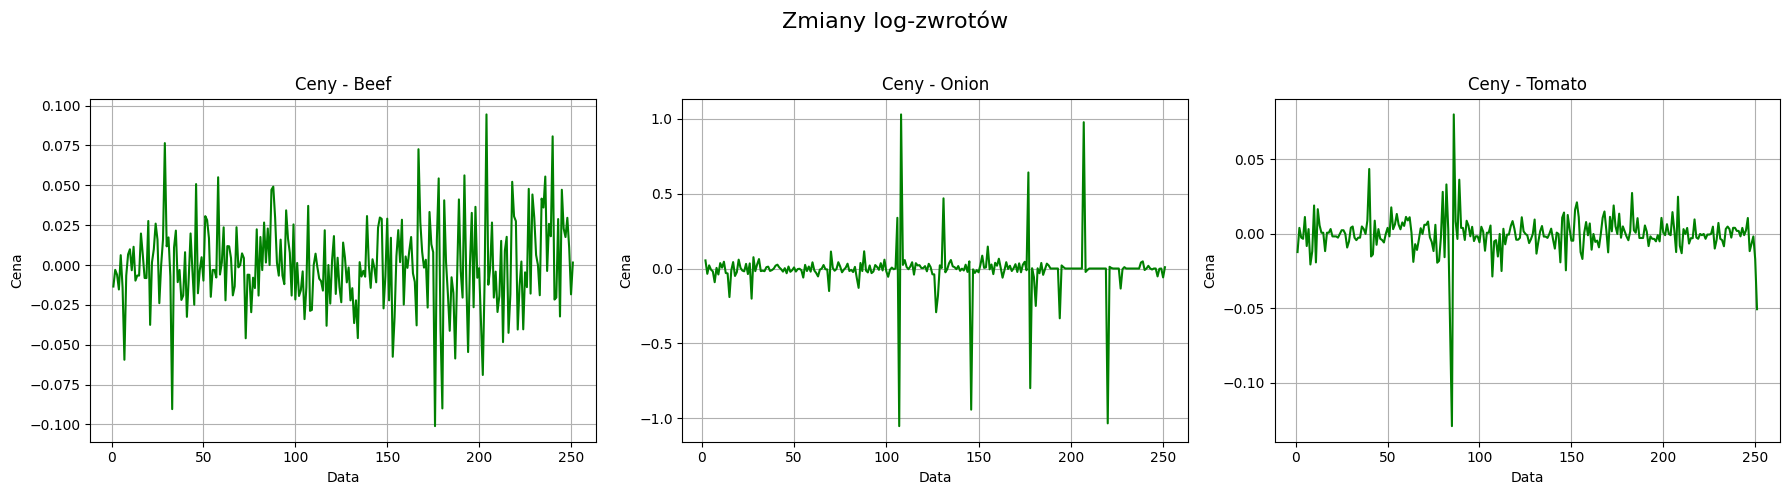

In [10]:
def plot_logret_series(price_dict):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

    for ax, (name, series) in zip(axes, price_dict.items()):
        ax.plot(series.index, series.values, color='green')
        ax.set_title(f"Ceny - {name}")
        ax.set_xlabel("Data")
        ax.set_ylabel("Cena")
        ax.grid(True)

    plt.suptitle("Zmiany log-zwrotów", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

logret_data = {
    'Beef': logret_beef_data,
    'Onion': logret_onion_data,
    'Tomato': logret_tomato_data
}

plot_logret_series(logret_data)

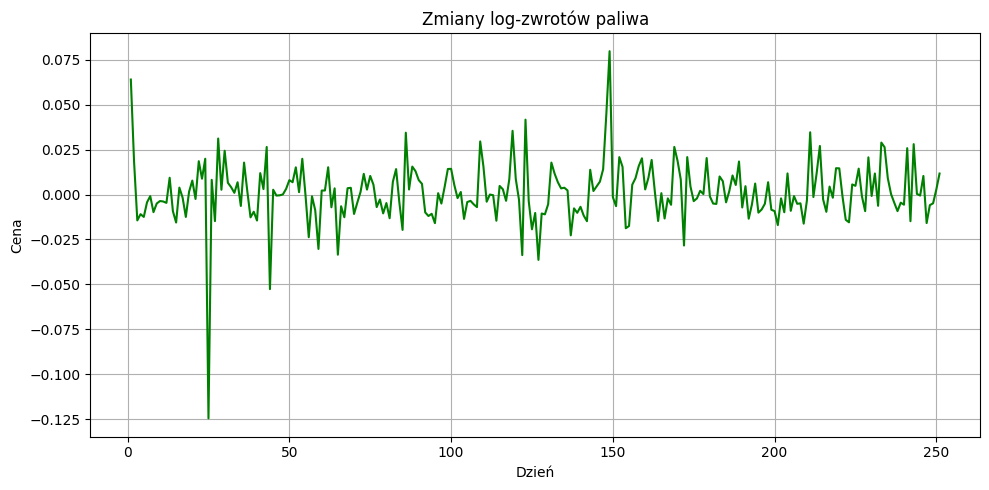

In [11]:
def plot_logret_stock(logret_stock_data, title="Zmiany log-zwrotów paliwa"):
    plt.figure(figsize=(10, 5))
    plt.plot(logret_stock_data.index, logret_stock_data.values, color='green')
    plt.title(title)
    plt.xlabel("Dzień")
    plt.ylabel("Cena")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_logret_stock(logret_fuel_data)

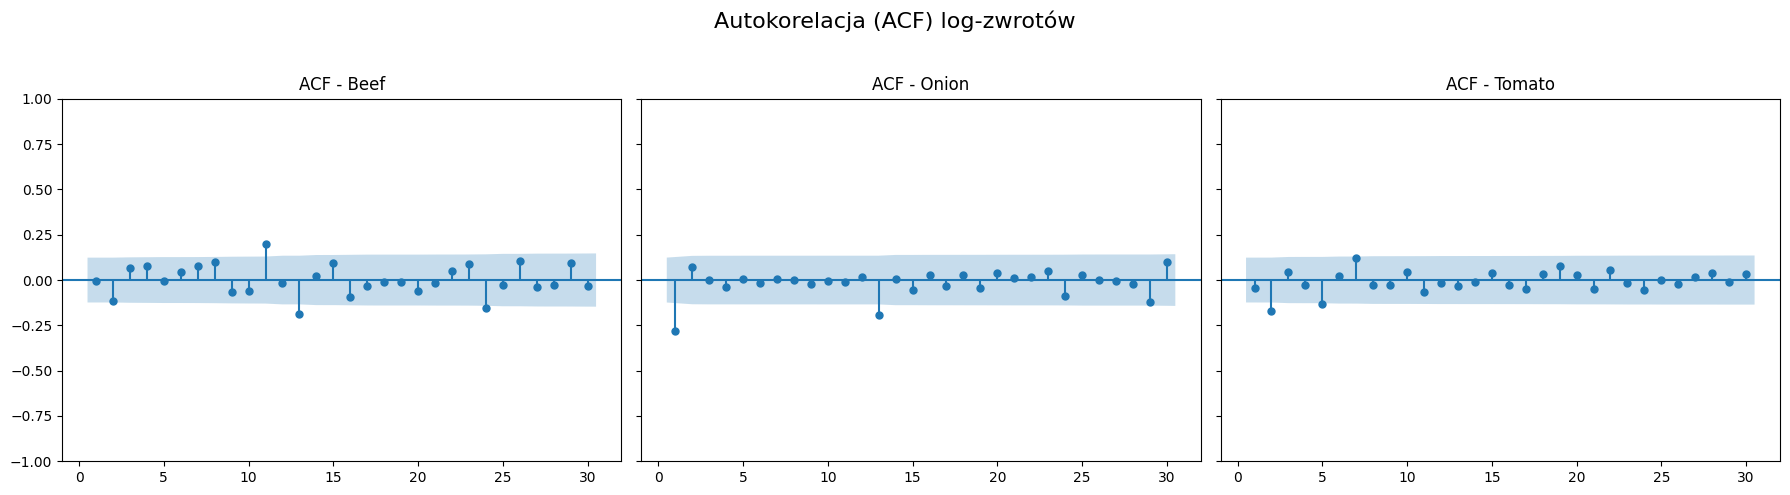

In [12]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_acf(logret_beef_data.dropna(), ax=axes[0], lags=30, title='ACF - Beef', zero=False)
plot_acf(logret_onion_data.dropna(), ax=axes[1], lags=30, title='ACF - Onion', zero=False)
plot_acf(logret_tomato_data.dropna(), ax=axes[2], lags=30, title='ACF - Tomato', zero=False)

plt.suptitle("Autokorelacja (ACF) log-zwrotów", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Dane są względnie i.i.d. (dane rzeczywiste nigdy nie będą idelanie i.i.d.)

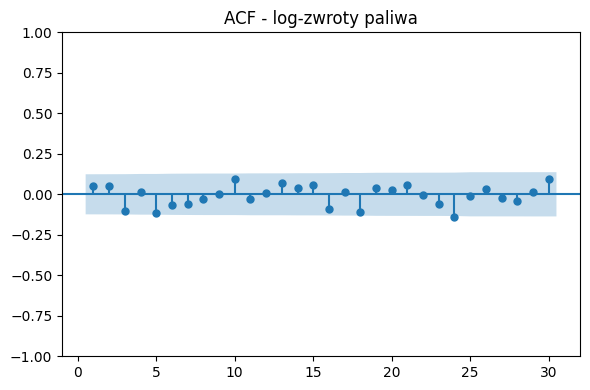

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_acf(logret_fuel_data.dropna(), ax=ax, lags=30, title="ACF - log-zwroty paliwa", zero=False)

plt.tight_layout()
plt.show()

# Ad. 1

## MIARY ZMIENNOŚCI

DLA ZWROTÓW

a) empiryczne

In [44]:
def calculate_volatility_metrics_from_logrets(log_returns, freq=252, window=30):
    
    mean = np.mean(log_returns ** 2)
    semi_deviations = log_returns[log_returns < mean] - mean
    semi_variance = np.mean(semi_deviations ** 2)
    semi_std = np.sqrt(semi_variance)
    volatility_metrics = {
        'Wariancja': np.var(log_returns),
        'Odchylenie standardowe': np.std(log_returns),
        'Semi-wariancja': semi_variance,
        'Semi-odchylenie standardowe': semi_std
    }

    df = pd.DataFrame.from_dict(volatility_metrics, orient='index', columns=['Value'])
    df['Value'] = df['Value'] * 100
    return df
 


In [45]:
ingredients = {
    'beef': logret_beef_data.squeeze(),    
    'onion': logret_onion_data.squeeze(),
    'tomato': logret_tomato_data.squeeze(),
    'fuel': logret_fuel_data.squeeze()
}

volatility_results = pd.DataFrame()

for name, series in ingredients.items():
    metrics = calculate_volatility_metrics_from_logrets(series)
    metrics.columns = [name]  
    if volatility_results.empty:
        volatility_results = metrics
    else:
        volatility_results = pd.concat([volatility_results, metrics], axis=1)

display(volatility_results.style.format("{:.2f}%"))


,beef,onion,tomato,fuel
Wariancja,0.08%,2.83%,0.02%,0.03%
Odchylenie standardowe,2.75%,16.81%,1.44%,1.68%
Semi-wariancja,0.07%,2.28%,0.02%,0.03%
Semi-odchylenie standardowe,2.66%,15.10%,1.55%,1.66%


b) teoretyczne

In [46]:
import math
def theory_from_logrets(data, freq=252, window=30):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data >= Q1 - 3 * IQR) & (data <= Q3 + 3 * IQR)]


    mu, std = stats.norm.fit(data)

    volatility_metrics = {
        'Odchylenie standardowe': std,
        'Wariancja': std**2,
    }

    df = pd.DataFrame.from_dict(volatility_metrics, orient='index', columns=['Value'])
    df['Value'] = df['Value'] * 100
    return df



ingredients = {
    'beef': logret_beef_data.squeeze(),    
    'onion': logret_onion_data.squeeze(),
    'tomato': logret_tomato_data.squeeze(),
    'fuel': logret_fuel_data.squeeze()
}

volatility_results = pd.DataFrame()

for name, series in ingredients.items():
    metrics = theory_from_logrets(series)
    metrics.columns = [name]  
    if volatility_results.empty:
        volatility_results = metrics
    else:
        volatility_results = pd.concat([volatility_results, metrics], axis=1)

display(volatility_results.style.format("{:.2f}%"))


,beef,onion,tomato,fuel
Odchylenie standardowe,2.75%,2.72%,0.86%,1.35%
Wariancja,0.08%,0.07%,0.01%,0.02%


## KWANTYLE

DLA ZWROTÓW

In [49]:
def calculate_quantiles_from_logrets(log_returns, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95]):
    quantile_values = {f"Q{int(q*100)}": log_returns.quantile(q) for q in quantiles}
    return quantile_values

def calculate_cvar(log_returns, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99]):
    cvar_values = {}
    for q in quantiles:
        quantile_value = log_returns.quantile(q)
        cvar_values[f"CVaR_{int(q*100)}"] = log_returns[log_returns <= quantile_value].mean()
    return cvar_values

In [62]:
def quqntile_table(logret_portfel_data, title):
    portfolio_quantile_empiric = calculate_quantiles_from_logrets(logret_portfel_data)

    quantiles = [0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
    portfolio_quantile_theoretical = {f"Q{int(q*100)}": mu - norm.ppf(1 - q) * sigma for q in quantiles}
    portfolio_cvar = calculate_cvar(logret_portfel_data)

    # Tworzenie tabeli z wynikami
    quantile_results = pd.DataFrame({
        'VaR': ['5%', '25%', '50%', '75%', '95%', '99%'],
        'Empiryczny': [portfolio_quantile_empiric[f"Q{int(q*100)}"] for q in quantiles],
        'Teoretyczny': [portfolio_quantile_theoretical[f"Q{int(q*100)}"] for q in quantiles],
        'CVaR': [portfolio_cvar[f"CVaR_{int(q*100)}"] for q in quantiles]
    })

    # Formatowanie wyników (opcjonalnie na 6 miejsc po przecinku)
    quantile_results['Empiryczny'] = quantile_results['Empiryczny'].apply(lambda x: f'{x:.6f}')
    quantile_results['Teoretyczny'] = quantile_results['Teoretyczny'].apply(lambda x: f'{x:.6f}')

    quantile_results.index = [''] * len(quantile_results)
    
    print(title)
    # Wyświetlenie wyników
    display(quantile_results)

quqntile_table(logret_beef_data, 'WOŁOWINA')
quqntile_table(logret_onion_data, 'CEBULA')
quqntile_table(logret_tomato_data, 'POMIDOR')
quqntile_table(logret_fuel_data, 'PALIWO')

WOŁOWINA


,VaR,Empiryczny,Teoretyczny,CVaR
,5%,-0.040880,-0.033464,-0.061909
,25%,-0.015939,-0.013866,-0.032894
,50%,-0.001800,-0.000243,-0.020444
,75%,0.016977,0.013379,-0.011734
,95%,0.047216,0.032978,-0.003484
,99%,0.074576,0.046742,-0.001162


CEBULA


,VaR,Empiryczny,Teoretyczny,CVaR
,5%,-0.112034,-0.033464,-0.436997
,25%,-0.016621,-0.013866,-0.116449
,50%,0.000000,-0.000243,-0.051703
,75%,0.016198,0.013379,-0.039725
,95%,0.059105,0.032978,-0.024475
,99%,0.556007,0.046742,-0.017292


POMIDOR


,VaR,Empiryczny,Teoretyczny,CVaR
,5%,-0.016821,-0.033464,-0.034751
,25%,-0.004093,-0.013866,-0.013955
,50%,0.000000,-0.000243,-0.007336
,75%,0.004806,0.013379,-0.004644
,95%,0.015661,0.032978,-0.001870
,99%,0.034837,0.046742,-0.000890


PALIWO


,VaR,Empiryczny,Teoretyczny,CVaR
,5%,-0.017281,-0.033464,-0.035455
,25%,-0.006991,-0.013866,-0.016592
,50%,0.000048,-0.000243,-0.010022
,75%,0.008607,0.013379,-0.005379
,95%,0.026462,0.032978,-0.001009
,99%,0.043359,0.046742,0.000310


Boxploty

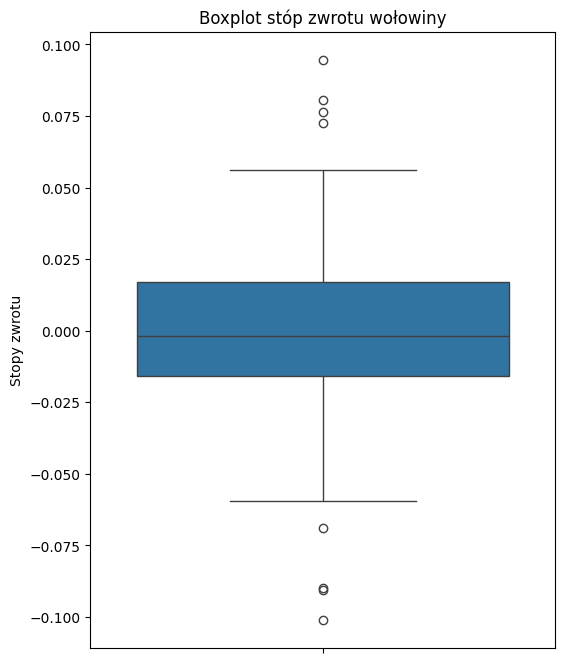

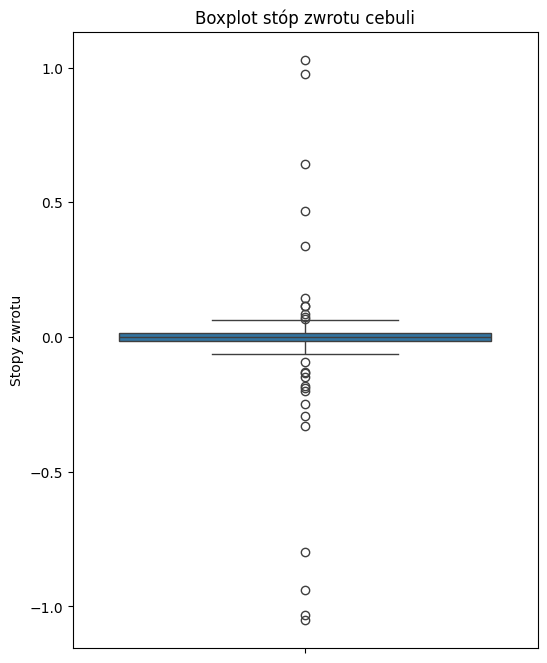

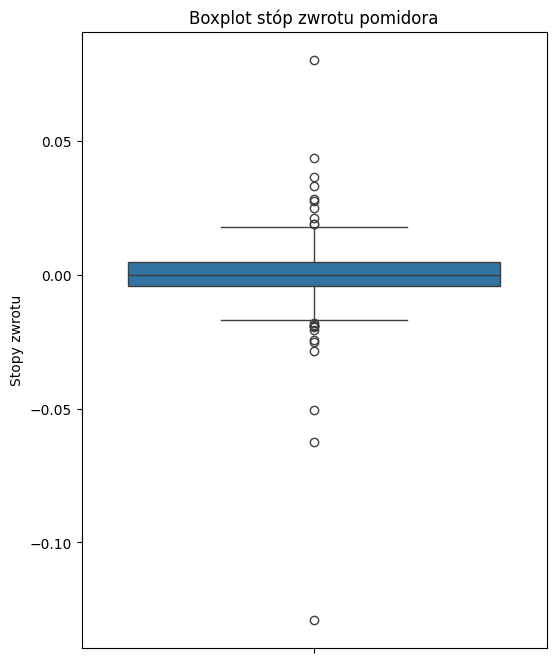

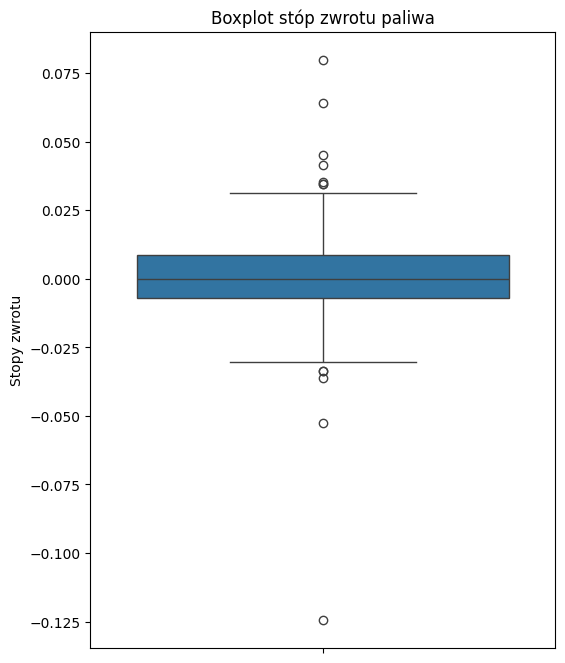

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ustawienie rozmiaru wykresu (np. 10x6 cali)
def boxplot_function(logret_portfel_data, title):
    plt.figure(figsize=(6,8))

    # Załóżmy, że masz dane w postaci Pandas DataFrame lub serii (logret_portfel_data)
    sns.boxplot(data=logret_portfel_data)

    # Dodanie tytułu i etykiet
    plt.title(f'Boxplot stóp zwrotu {title}')
    plt.ylabel('Stopy zwrotu')

    # Wyświetlenie wykresu
    plt.show()

boxplot_function(logret_beef_data, 'wołowiny')
boxplot_function(logret_onion_data, 'cebuli')
boxplot_function(logret_tomato_data, 'pomidora')
boxplot_function(logret_fuel_data, 'paliwa')


## DYSTRYBUANTA - 


In [19]:
def plot_cdf(data, title = ''):
    sorted_data = np.sort(data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue')
    
    plt.title(f"Dystrybuanta (CDF) {title}")
    plt.xlabel("Wahanie cen")
    plt.ylabel("Prawdopodobieństwo skumulowane")
    plt.grid(True)
    plt.show()

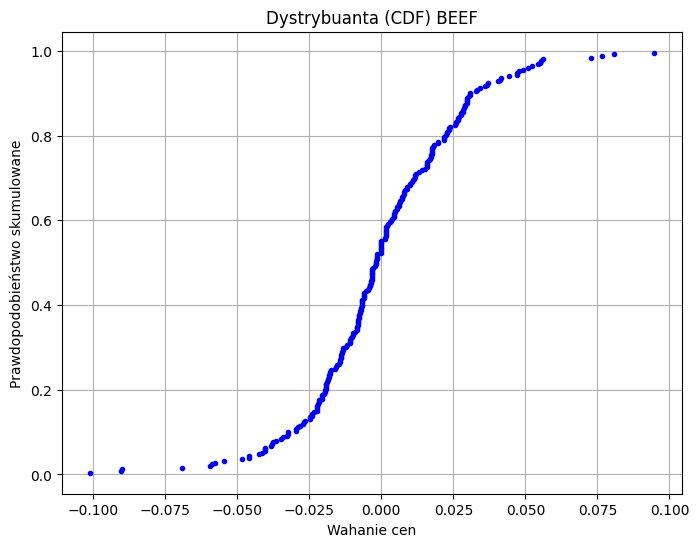

In [20]:
plot_cdf(logret_beef_data, "BEEF")

DLA ZWROTÓW

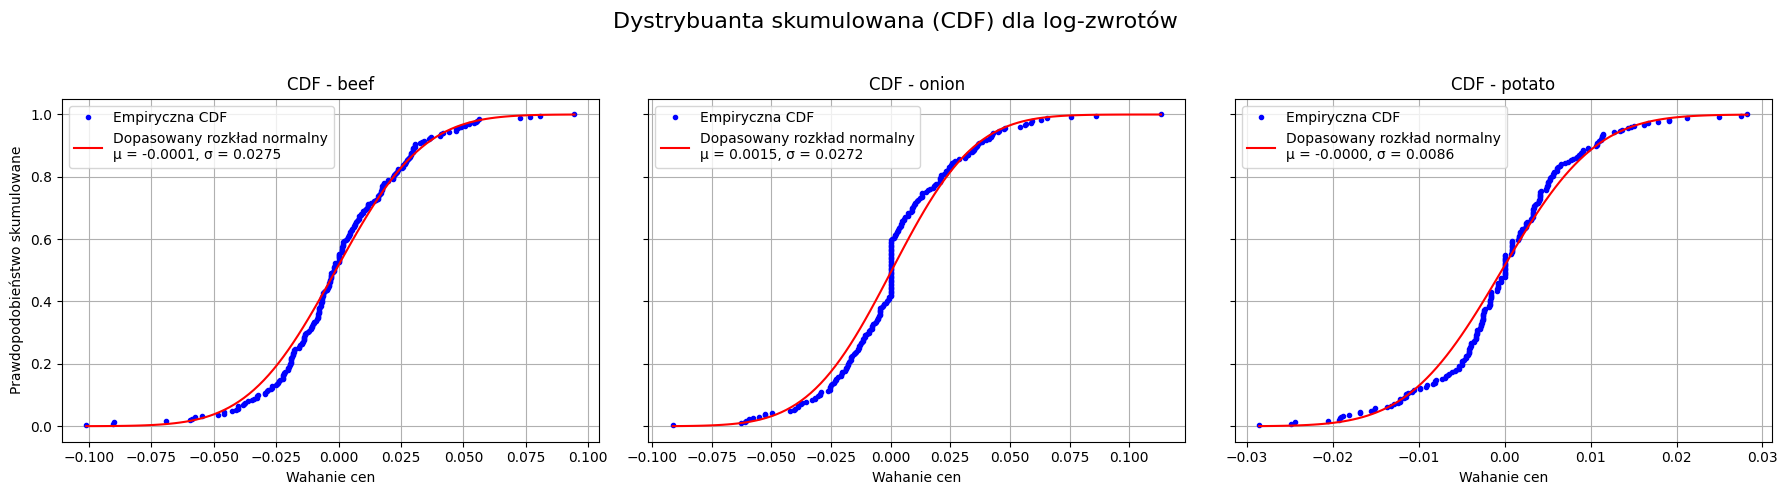

In [21]:

def plot_multiple_cdfs(data_dict):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for ax, (name, data) in zip(axes, data_dict.items()):
        # Usuwanie brakujących danych (NaN)
        data = data[~np.isnan(data)]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1

        z_scores = stats.zscore(data)
        # Usuwanie wartości ekstremalnych (np. powyżej 3 odchyleń standardowych od średniej)
        mean = np.mean(data)
        std = np.std(data)
        data = data[(data >= Q1 - 3 * IQR) & (data <= Q3 + 3 * IQR)]
        
        # Obliczanie CDF danych
        sorted_data = np.sort(data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        
        # Rysowanie CDF
        ax.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue', label="Empiryczna CDF")
        
        # Dopasowanie rozkładu normalnego
        mu, std = stats.norm.fit(data)
        x = np.linspace(sorted_data.min(), sorted_data.max(), 100)
        normal_pdf = stats.norm.pdf(x, mu, std)
        normal_cdf = np.cumsum(normal_pdf) * (x[1] - x[0])  # Skumulowana funkcja rozkładu normalnego
        
        # Rysowanie dopasowanego rozkładu normalnego
        label = f"Dopasowany rozkład normalny\nμ = {mu:.4f}, σ = {std:.4f}"
        ax.plot(x, normal_cdf, 'r-', label=label)
        
        # Ustawienia wykresu
        ax.set_title(f"CDF - {name}")
        ax.set_xlabel("Wahanie cen")
        ax.grid(True)
        ax.legend()
    
    axes[0].set_ylabel("Prawdopodobieństwo skumulowane")
    plt.suptitle("Dystrybuanta skumulowana (CDF) dla log-zwrotów", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Przykładowe dane - musisz dostarczyć odpowiednie dane dla zmiennych logret_beef_data, logret_onion_data, logret_tomato_data
data_dict = {
    'beef': logret_beef_data.squeeze(),
    'onion': logret_onion_data.squeeze(),
    'potato': logret_tomato_data.squeeze()
}

plot_multiple_cdfs(data_dict)


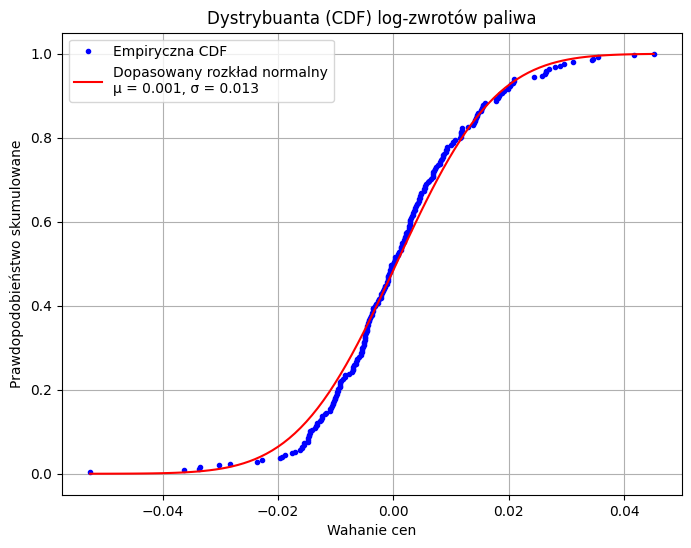

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_cdf(data, title=''):
    # Usuwanie brakujących danych (NaN)
    data = data[~np.isnan(data)]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

        # Usuwanie wartości ekstremalnych (np. powyżej 3 odchyleń standardowych od średniej
    data = data[(data >= Q1 - 3 * IQR) & (data <= Q3 + 3 * IQR)]
    
    
    # Obliczanie CDF danych
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Rysowanie CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue', label="Empiryczna CDF")
    
    # Dopasowanie rozkładu normalnego
    mu, std = stats.norm.fit(data)
    x = np.linspace(sorted_data.min(), sorted_data.max(), 100)
    normal_pdf = stats.norm.pdf(x, mu, std)
    normal_cdf = np.cumsum(normal_pdf) * (x[1] - x[0])  # Skumulowana funkcja rozkładu normalnego
    
    # Rysowanie dopasowanego rozkładu normalnego
    label = f"Dopasowany rozkład normalny\nμ = {mu:.3f}, σ = {std:.3f}"
    plt.plot(x, normal_cdf, 'r-', label=label)
    
    # Ustawienia wykresu
    plt.title(f"Dystrybuanta (CDF) {title}")
    plt.xlabel("Wahanie cen")
    plt.ylabel("Prawdopodobieństwo skumulowane")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cdf(logret_fuel_data, 'log-zwrotów paliwa')



## heatmapy

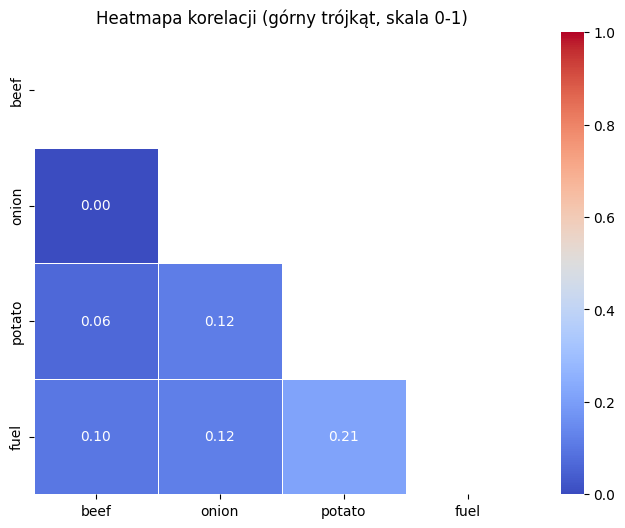

In [23]:
import seaborn as sns

# Przykładowe dane
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Przykładowe dane
data = {
    'beef': logret_beef_data.squeeze(),
    'onion': logret_onion_data.squeeze(),
    'potato': logret_tomato_data.squeeze(),
    'fuel': logret_fuel_data.squeeze()
}


# Tworzenie DataFrame
df = pd.DataFrame(data)

# Obliczenie macierzy korelacji
corr_matrix = df.corr()

# Normalizacja wartości od 0 do 1
corr_matrix = (corr_matrix - corr_matrix.min().min()) / (corr_matrix.max().max() - corr_matrix.min().min())

# Ustawienie dolnej części macierzy na NaN (dla trójkąta górnego)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', mask=mask, vmin=0, vmax=1)
plt.title("Heatmapa korelacji (górny trójkąt, skala 0-1)")
plt.show()


# Ad. 2

Moja propozycja wag dla portfela:

In [24]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Tworzymy DataFrame z danymi
data = {
    'wołowina': logret_beef_data,
    'cebula': logret_onion_data,
    'pomidor': logret_tomato_data
}
df = pd.DataFrame(data)

# Obliczamy średnie stopy zwrotu dla każdego składnika
mean_returns = df.mean()

# Obliczamy macierz kowariancji
cov_matrix = df.cov()

# Liczba składników
n_assets = len(data)

# Funkcja celu: minimalizowanie wariancji portfela
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Ograniczenie: suma wag = 1
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Ograniczenia indywidualne wag:
# wołowina: min 60%, max 80%
# cebula: max 20%
# pomidor: min 0%, max 40% (dopasowujemy, żeby suma nadal mogła wynieść 1)
bounds = (
    (0.6, 0.8),  # wołowina
    (0.0, 0.2),  # cebula
    (0.0, 0.4)   # pomidor
)

# Inicjalizacja wag (mogą być zgodne ze środkiem ograniczeń)
initial_weights = np.array([0.7, 0.1, 0.2])

# Optymalizacja
opt_result = minimize(
    portfolio_variance,
    initial_weights,
    args=(cov_matrix,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Wyniki
optimal_weights = opt_result.x

print("\n✅ Optymalne wagi przy ograniczeniach strategicznych:")
for asset, weight in zip(data.keys(), optimal_weights):
    print(f"{asset}: {weight:.4f}")

min_variance = portfolio_variance(optimal_weights, cov_matrix)
print(f"\n🔻 Minimalna wariancja portfela: {min_variance:.6f}")



✅ Optymalne wagi przy ograniczeniach strategicznych:
wołowina: 0.7268
cebula: 0.0196
pomidor: 0.2537

🔻 Minimalna wariancja portfela: 0.000407


In [25]:
optimal_weights_table = pd.DataFrame({
    'Aktyw': ["Wołowina", 'Cebula', 'Pomidor'],
    'Waga': optimal_weights,
})

# Wyświetlanie tabeli z kluczowymi punktami
optimal_weights_table.index = [''] * len(optimal_weights_table)
optimal_weights_table

,Aktyw,Waga
,Wołowina,0.726755
,Cebula,0.019576
,Pomidor,0.253668


In [26]:
weights = optimal_weights
wg_beef = optimal_weights[0]
wg_onion = optimal_weights[1]
wg_tomato = optimal_weights[2]

portfel_data = wg_beef* beef_data + wg_onion*onion_data + wg_tomato*tomato_data
logret_portfel_data = wg_beef* logret_beef_data + wg_onion*logret_onion_data + wg_tomato*logret_tomato_data

In [27]:
merged_loogret_data = pd.concat([logret_beef_data, logret_onion_data, logret_tomato_data], axis=1)

cov_matrix = merged_loogret_data.cov()

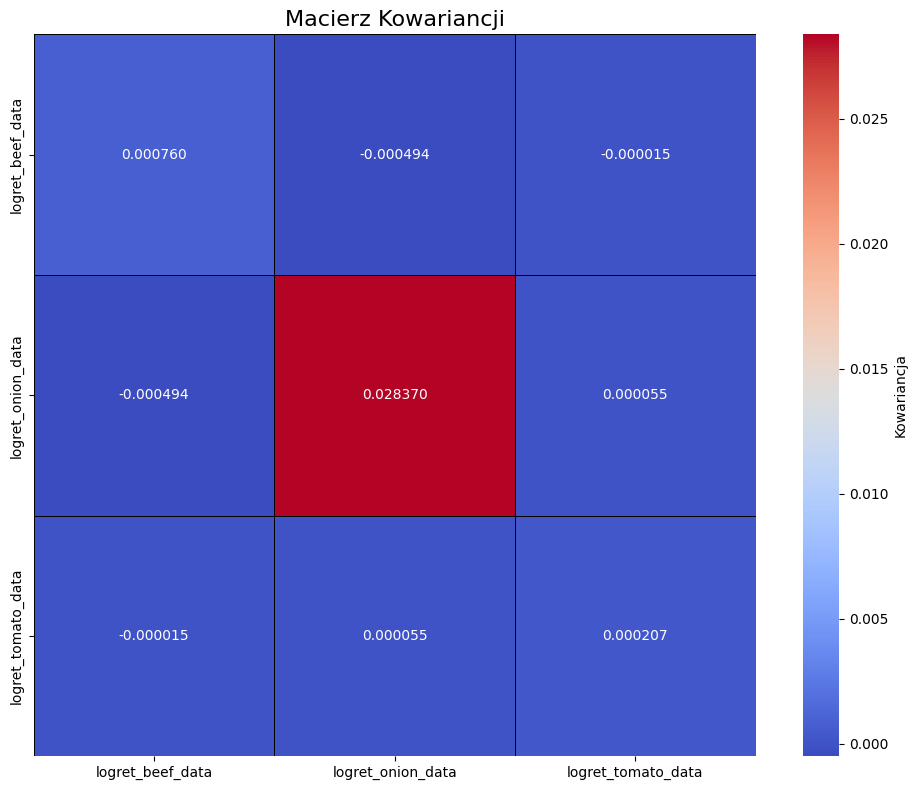

In [28]:
# Tworzymy estetyczną mapę ciepła z seaborn
plt.figure(figsize=(10, 8))  # Ustalamy rozmiar wykresu
sns.heatmap(cov_matrix, annot=True, fmt='.6f', cmap='coolwarm', cbar_kws={'label': 'Kowariancja'}, 
            linewidths=0.5, linecolor='black', square=True)

# Dodatkowe ustawienia estetyczne
plt.title('Macierz Kowariancji', fontsize=16)
plt.tight_layout()

# Wyświetlamy wykres
plt.show()

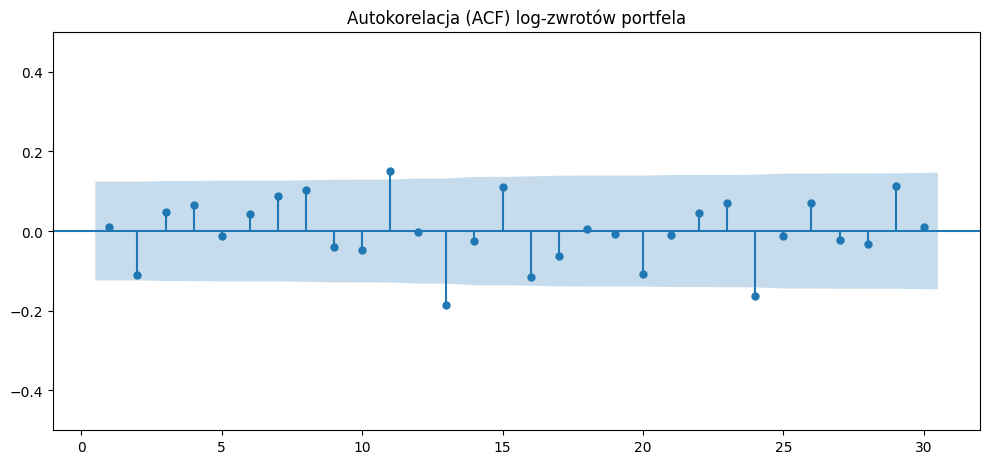

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(logret_portfel_data.dropna(), lags=30, ax=ax, title='Autokorelacja (ACF) log-zwrotów portfela', zero=False)

# Ustawienie limitów osi Y
ax.set_ylim(-0.5, 0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [30]:
#Test na normalność
import numpy as np
from scipy import stats

# Test normalności Shapiro-Wilka
stat, p_value = stats.shapiro(logret_portfel_data)

print('Statystyka testu:', stat)
print('P-value:', p_value)

# Interpretacja wyniku
if p_value > 0.05:
    print("Nie odrzucamy hipotezy zerowej - dane są normalnie rozłożone")
else:
    print("Odrzucamy hipotezę zerową - dane nie są normalnie rozłożone")

Statystyka testu: nan
P-value: 1.0
Nie odrzucamy hipotezy zerowej - dane są normalnie rozłożone


In [31]:
#Dopasowywanie rozkładu normlanego do danych
mean = np.mean(logret_portfel_data)  
std = np.std(logret_portfel_data)  
print(mean, std)

data = logret_portfel_data[(logret_portfel_data > mean - 3*std) & (logret_portfel_data < mean + 3*std)]
sorted_data = np.sort(data)
mu, sigma = stats.norm.fit(sorted_data)
print(mu, std)


-0.00024309638035892577 0.020156452491988795
0.0003049528059576075 0.020156452491988795


**Miary Zmienności**

Ogólna zmienność (mierzoną przez wariancję i odchylenie standardowe) w danych jest nieco wyższa w rzeczywistości (empirycznie) niż przewidywano teoretycznie. Może to sugerować, że wyniki są bardziej zmienne niż zakładałby idealny rozkład normalny (np. może to wynikać z obecności nieoczekiwanych ekstremów).

Zmniejszenie ryzyka strat: Semi-wariancja i semi-odchylenie standardowe wskazują, że ryzyko strat (czyli zmienność wyników poniżej średniej) jest stosunkowo niskie w badanym okresie. Zatem, portfel lub inwestycja, o której mówimy, nie doświadcza dużych, nieprzewidzianych strat.

Teoretyczny model jest nieco zaniżony: Rzeczywiste dane wykazują większą zmienność niż teoretyczny rozkład (np. rozkład normalny), co może sugerować, że w rzeczywistości istnieje większe ryzyko wahań lub nieregularności w analizowanych danych.

In [32]:
portfolio_variance_empiric = sum(weights[i] * weights[j] * cov_matrix.iloc[i, j] for i in range(len(weights)) for j in range(len(weights)))
portfolio_volatility_empiric = portfolio_variance_empiric ** 0.5

# Tworzymy DataFrame z wynikami
portfolio_results = pd.DataFrame({
    '': ['Wariancja', 'Odchylenie standardowe'],
    'Empiryczne': [portfolio_variance_empiric, portfolio_volatility_empiric],
    'Teoretyczne': [sigma**2, sigma]
})

portfolio_results.index = [''] * len(portfolio_results)

# Wyświetlanie tabeli
portfolio_results

,,Empiryczne,Teoretyczne
,Wariancja,0.000407,0.000337
,Odchylenie standardowe,0.020172,0.018364


In [33]:
# Semi-wariancja (tylko wartości poniżej średniej)
semi_deviations = logret_portfel_data[logret_portfel_data < mean] - mean
semi_variance = np.mean(semi_deviations ** 2)
semi_std = np.sqrt(semi_variance)

# Tworzymy DataFrame z wynikami
portfolio_semiresults = pd.DataFrame({
    '': ['Semi-wariancja', 'Semi-dchylenie standardowe'],
    'Wartości': [semi_variance, semi_std]
})

portfolio_semiresults.index = [''] * len(portfolio_semiresults)

# Wyświetlanie tabeli
portfolio_semiresults


,,Wartości
,Semi-wariancja,0.000363
,Semi-dchylenie standardowe,0.019046


**Kwantyle (Value at Risk (VaR))**

VaR (Value at Risk) określa wartość portfela, którą możemy stracić w danym przedziale procentowym (np. 5%, 25%, itd.). Im wyższy VaR, tym większa zmienność i potencjalne straty.

CVaR (Conditional Value at Risk) rozszerza koncepcję VaR, analizując, jak duże będą średnie straty w przypadku, gdy przekroczymy poziom określonego VaR (np. w przypadku 5% najgorszych wyników).

Warto zauważyć, że wartości CVaR są zawsze bardziej negatywne niż VaR (poza wyższymi kwantylami, gdzie VaR staje się dodatni), ponieważ uwzględniają dodatkowe straty w skrajnych przypadkach, a nie tylko te na poziomie VaR.

In [34]:
# Obliczanie empirycznych kwantyli
def calculate_quantiles_from_logrets(log_returns, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99]):
    quantile_values = {f"Q{int(q*100)}": log_returns.quantile(q) for q in quantiles}
    return quantile_values

def calculate_cvar(log_returns, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99]):
    cvar_values = {}
    for q in quantiles:
        quantile_value = log_returns.quantile(q)
        cvar_values[f"CVaR_{int(q*100)}"] = log_returns[log_returns <= quantile_value].mean()
    return cvar_values

portfolio_quantile_empiric = calculate_quantiles_from_logrets(logret_portfel_data)

quantiles = [0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
portfolio_quantile_theoretical = {f"Q{int(q*100)}": mu - norm.ppf(1 - q) * sigma for q in quantiles}
portfolio_cvar = calculate_cvar(logret_portfel_data)

# Tworzenie tabeli z wynikami
quantile_results = pd.DataFrame({
    'VaR': ['5%', '25%', '50%', '75%', '95%', '99%'],
    'Empiryczny': [portfolio_quantile_empiric[f"Q{int(q*100)}"] for q in quantiles],
    'Teoretyczny': [portfolio_quantile_theoretical[f"Q{int(q*100)}"] for q in quantiles],
    'CVaR': [portfolio_cvar[f"CVaR_{int(q*100)}"] for q in quantiles]
})

# Formatowanie wyników (opcjonalnie na 6 miejsc po przecinku)
quantile_results['Empiryczny'] = quantile_results['Empiryczny'].apply(lambda x: f'{x:.6f}')
quantile_results['Teoretyczny'] = quantile_results['Teoretyczny'].apply(lambda x: f'{x:.6f}')

quantile_results.index = [''] * len(quantile_results)

# Wyświetlenie wyników
quantile_results

,VaR,Empiryczny,Teoretyczny,CVaR
,5%,-0.029419,-0.029901,-0.044886
,25%,-0.012514,-0.012081,-0.023975
,50%,-0.002048,0.000305,-0.015258
,75%,0.011408,0.012691,-0.008868
,95%,0.034227,0.030511,-0.002687
,99%,0.054956,0.043026,-0.000988


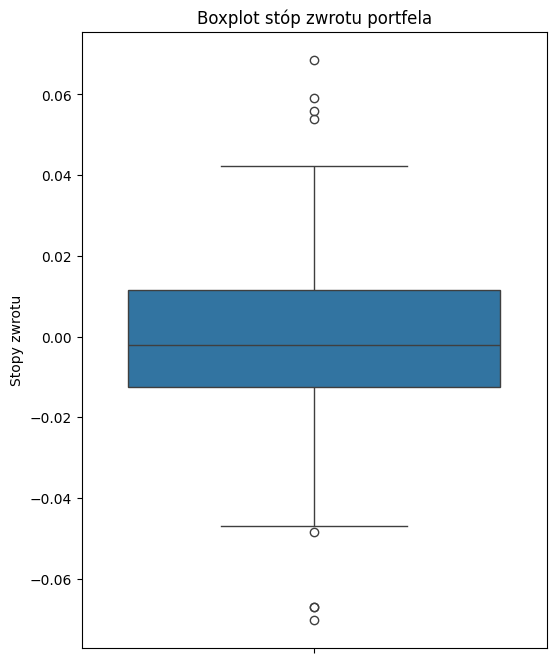

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ustawienie rozmiaru wykresu (np. 10x6 cali)
plt.figure(figsize=(6, 8))

# Załóżmy, że masz dane w postaci Pandas DataFrame lub serii (logret_portfel_data)
sns.boxplot(data=logret_portfel_data)

# Dodanie tytułu i etykiet
plt.title('Boxplot stóp zwrotu portfela')
plt.ylabel('Stopy zwrotu')

# Wyświetlenie wykresu
plt.show()


Dystrybuanta i dopasowanie rozkąłdu normalnego

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Tworzenie tabeli z wartościami danych i odpowiadającymi im wartościami CDF
cdf_table = pd.DataFrame({
    'Wartość': sorted_data,
    'CDF': cdf
})

# Wybór kilku kluczowych punktów CDF do interpretacji (np. percentyle)
key_percentiles = [1, 5, 10, 50, 95, 99]  # Możesz dostosować te wartości
key_values = np.percentile(sorted_data, key_percentiles)

# Zbieranie kluczowych punktów CDF
key_cdf_values = cdf[np.searchsorted(sorted_data, key_values)]

# Tworzenie tabeli z kluczowymi punktami
key_points_table = pd.DataFrame({
    'Percentyl': key_percentiles,
    'Wartość': key_values,
    'CDF': key_cdf_values
})

# Wyświetlanie tabeli z kluczowymi punktami
key_points_table.index = [''] * len(key_points_table)
key_points_table


,Percentyl,Wartość,CDF
,1,-0.043501,0.016260
,5,-0.028572,0.056911
,10,-0.019968,0.105691
,50,-0.001878,0.504065
,95,0.032841,0.951220
,99,0.048692,0.991870


0.00030495280595760766 0.018364136741583964


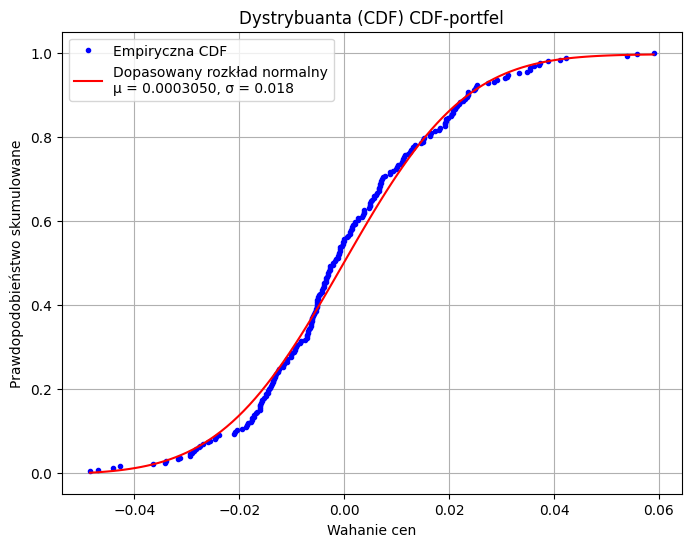

In [37]:
def plot_cdf(data, title=''):
    # Usuwanie brakujących danych (NaN)
    #data = data[~np.isnan(data)]
    
    # Usuwanie wartości ekstremalnych (np. powyżej 3 odchyleń standardowych od średniej)
    mean = np.mean(data)
    std = np.std(data)
    data = data[(data > mean - 3*std) & (data < mean + 3*std)]
    
    # Obliczanie CDF danych
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Rysowanie CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue', label="Empiryczna CDF")
    
    # Dopasowanie rozkładu normalnego
    mu, std = stats.norm.fit(data)
    print(mu, std)
    x = np.linspace(sorted_data.min(), sorted_data.max(), 100)
    normal_pdf = stats.norm.pdf(x, mu, std)
    normal_cdf = np.cumsum(normal_pdf) * (x[1] - x[0])  # Skumulowana funkcja rozkładu normalnego
    
    # Rysowanie dopasowanego rozkładu normalnego
    label = f"Dopasowany rozkład normalny\nμ = {mu:.7f}, σ = {std:.3f}"
    plt.plot(x, normal_cdf, 'r-', label=label)
    
    # Ustawienia wykresu
    plt.title(f"Dystrybuanta (CDF) {title}")
    plt.xlabel("Wahanie cen")
    plt.ylabel("Prawdopodobieństwo skumulowane")
    plt.grid(True)
    plt.legend()
    plt.show()


plot_cdf(logret_portfel_data, 'CDF-portfel')

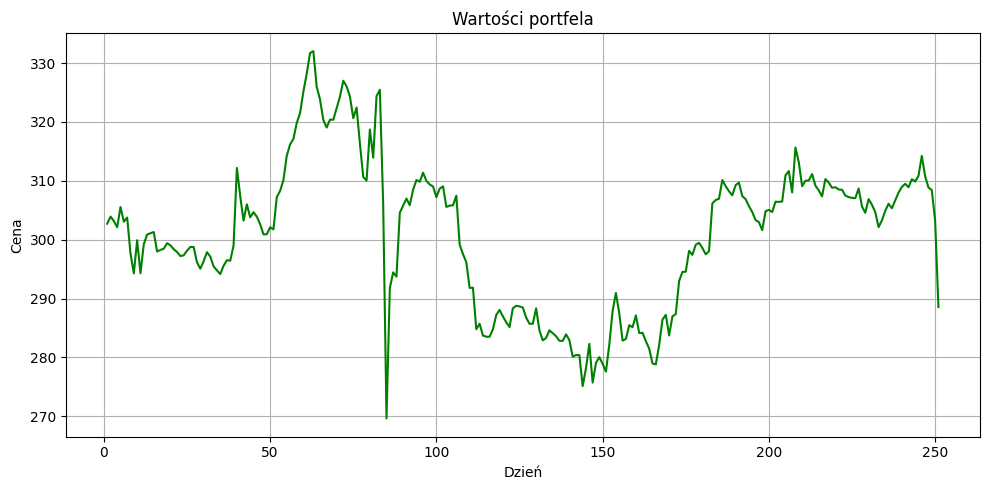

In [38]:
def plot_single_price_series(series, title="Wartości portfela"):
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, color='green')
    plt.title(title)
    plt.xlabel("Dzień")
    plt.ylabel("Cena")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_single_price_series(portfel_data)

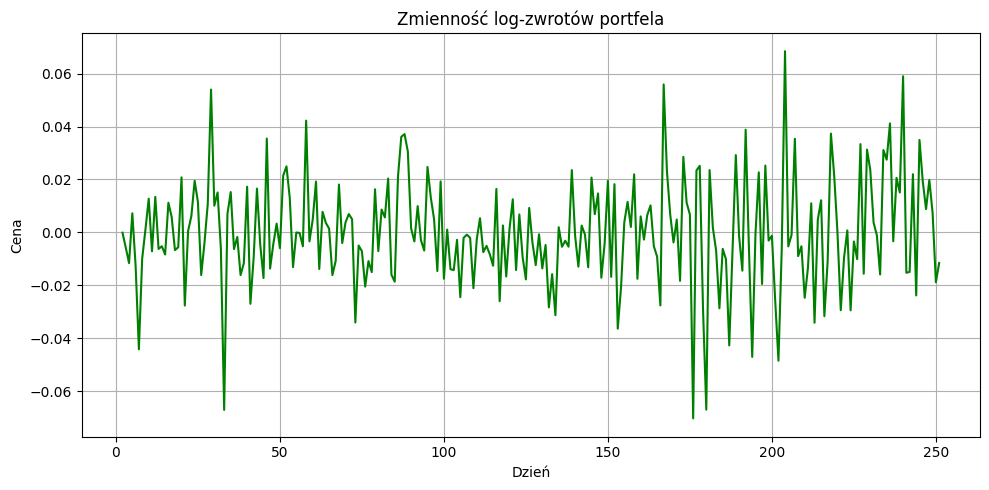

In [39]:
plot_single_price_series(logret_portfel_data, title= "Zmienność log-zwrotów portfela")

# AD 3 - dla fuel

Parametry rozkładu Gumbela: μ = 3.2793, β = 0.8692


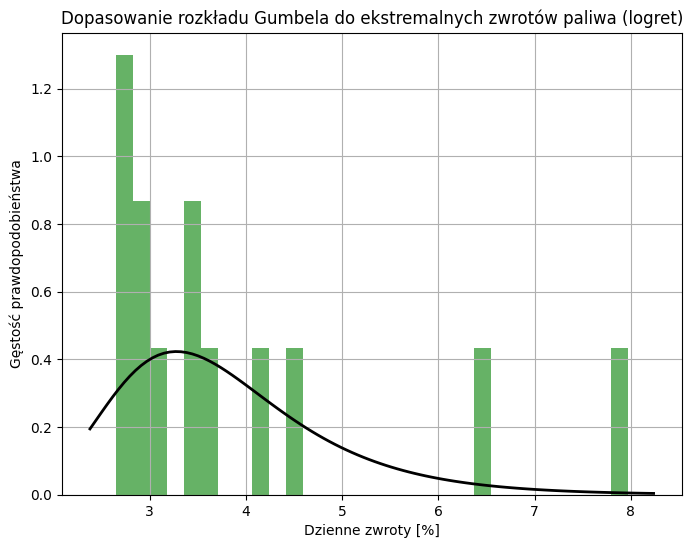

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Przeliczamy logret_fuel na procenty, żeby wartości były bardziej czytelne
daily_returns_percent = logret_fuel_data * 100

# 95. percentyl – granica wartości ekstremalnych
threshold = np.percentile(daily_returns_percent.dropna(), 95)

# Ekstremalne wartości powyżej progu
extreme_values = daily_returns_percent[daily_returns_percent > threshold]

# Dopasowanie rozkładu Gumbela
params = stats.gumbel_r.fit(extreme_values)

# Wypisanie parametrów
print(f"Parametry rozkładu Gumbela: μ = {params[0]:.4f}, β = {params[1]:.4f}")

# Rysowanie histogramu + gęstość rozkładu Gumbela
plt.figure(figsize=(8, 6))
plt.hist(extreme_values, bins=30, density=True, alpha=0.6, color='green')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.gumbel_r.pdf(x, *params)

plt.plot(x, p, 'k', linewidth=2)
plt.title("Dopasowanie rozkładu Gumbela do ekstremalnych zwrotów paliwa (logret)")
plt.xlabel("Dzienne zwroty [%]")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.grid(True)
plt.show()


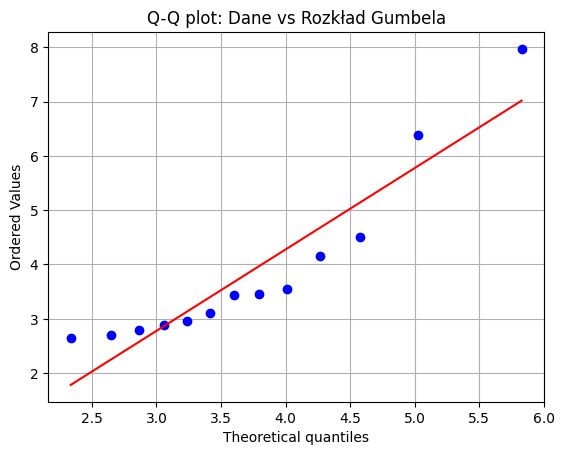

In [41]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot dla Gumbela
stats.probplot(extreme_values, dist=stats.gumbel_r, sparams=params, plot=plt)
plt.title("Q-Q plot: Dane vs Rozkład Gumbela")
plt.grid(True)
plt.show()


In [42]:
# Obliczanie 1% VaR z dopasowanego rozkładu Gumbela (wartość, która nie będzie przekroczona w 1% dni roboczych)
var_1_percent = stats.gumbel_r.ppf(0.01, *params)
print(f"1% VaR (Value at Risk): {var_1_percent}")


1% VaR (Value at Risk): 1.951875256561575


In [43]:
df = merged.copy()  
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)


df['logret_fuel_percent'] = df['logret_fuel_data'] * 100

weekly_maxima = df['logret_fuel_percent'].resample('W').max().dropna()


from scipy.stats import genextreme

gev_params = genextreme.fit(weekly_maxima)

print(f"Parametry GEV: shape = {gev_params[0]:.4f}, loc = {gev_params[1]:.4f}, scale = {gev_params[2]:.4f}")

plt.figure(figsize=(8, 6))
plt.hist(weekly_maxima, bins=30, density=True, alpha=0.6, color='skyblue')
x_vals = np.linspace(weekly_maxima.min(), weekly_maxima.max(), 100)
plt.plot(x_vals, genextreme.pdf(x_vals, *gev_params), 'k-', lw=2)
plt.title("Dopasowanie rozkładu GEV do tygodniowych maksimów zwrotów paliwa")
plt.xlabel("Tygodniowe maksima [%]")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.grid(True)
plt.show()

NameError: name 'merged' is not defined

Parametry GPD: shape = 0.4145, loc = 0.0009, scale = 0.7857


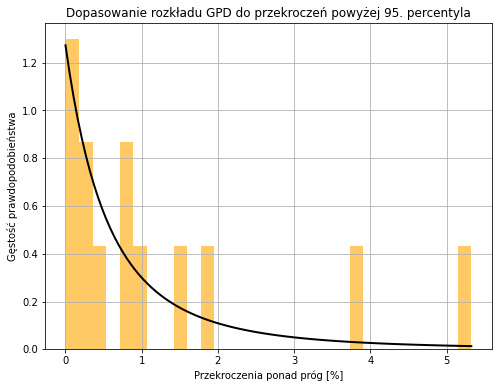

In [ ]:
threshold = np.percentile(df['logret_fuel_percent'].dropna(), 95)
exceedances = df['logret_fuel_percent'][df['logret_fuel_percent'] > threshold] - threshold
from scipy.stats import genpareto

gpd_params = genpareto.fit(exceedances)
print(f"Parametry GPD: shape = {gpd_params[0]:.4f}, loc = {gpd_params[1]:.4f}, scale = {gpd_params[2]:.4f}")
plt.figure(figsize=(8, 6))
plt.hist(exceedances, bins=30, density=True, alpha=0.6, color='orange')

x = np.linspace(min(exceedances), max(exceedances), 100)
plt.plot(x, genpareto.pdf(x, *gpd_params), 'k-', lw=2)

plt.title("Dopasowanie rozkładu GPD do przekroczeń powyżej 95. percentyla")
plt.xlabel("Przekroczenia ponad próg [%]")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.grid(True)
plt.show()


# Testowanie wsteczne dla przypadku jednowymiarowego - zadanie dodatkowe

In [ ]:
import numpy as np
from scipy.stats import f

# Podziel dane logarytmicznych stóp zwrotu paliwa na 2 okresy
half = len(df) // 2
returns1 = df['logret_fuel_data'].iloc[:half].dropna()
returns2 = df['logret_fuel_data'].iloc[half:].dropna()

# Oblicz wariancje i liczby stopni swobody
var1 = np.var(returns1, ddof=1)
var2 = np.var(returns2, ddof=1)
n1 = len(returns1)
n2 = len(returns2)

# Wartość statystyki F (większa wariancja w liczniku)
F = var1 / var2 if var1 > var2 else var2 / var1

# p-value (dwustronny test)
p_value = 2 * (1 - f.cdf(F, dfn=n1-1, dfd=n2-1))

print(f"F-statystyka: {F:.4f}")
print(f"P-wartość: {p_value:.4f}")

if p_value < 0.05:
    print("Odrzucamy H₀: Wariancje się różnią.")
else:
    print("Brak podstaw do odrzucenia H₀: Wariancje są równe.")


F-statystyka: 1.5618
P-wartość: 0.0134
Odrzucamy H₀: Wariancje się różnią.


In [ ]:
from scipy.stats import ttest_ind

# Test t-Studenta dla dwóch niezależnych próbek (z opcją equal_var=False dla różnych wariancji)
t_stat, p_t = ttest_ind(returns1, returns2, equal_var=False)

print(f"T-statystyka: {t_stat:.4f}")
print(f"P-wartość: {p_t:.4f}")

if p_t < 0.05:
    print("Odrzucamy H₀: Średnie się różnią.")
else:
    print("Brak podstaw do odrzucenia H₀: Średnie są równe.")


T-statystyka: -1.1093
P-wartość: 0.2684
Brak podstaw do odrzucenia H₀: Średnie są równe.


Testowanie wsteczne ryzyka dla zmiennej fuel_data przeprowadzono za pomocą testu F na równość wariancji oraz testu t-Studenta na równość średnich.

Wyniki testu F (F = 1.5618, p = 0.0134) wskazują na istotną statystycznie różnicę wariancji pomiędzy dwoma okresami, co sugeruje, że zmienność zwrotów nie jest stała w czasie. Oznacza to, że model ryzyka powinien uwzględniać możliwość zmiany ryzyka w czasie.

Jednocześnie test t-Studenta (T = -1.1093, p = 0.2684) nie wykazał różnicy w średnich zwrotach, co oznacza, że oczekiwany zwrot z inwestycji pozostał stabilny.

Wnioski z testowania wstecznego potwierdzają konieczność ciągłego monitorowania modeli ryzyka, szczególnie w zakresie ich zmienności.

In [ ]:
import numpy as np
from scipy.stats import f

# Podziel dane logarytmicznych stóp zwrotu paliwa na 2 okresy
half = len(df) // 2
returns11 = df['logret_tomato_data'].iloc[:half].dropna()
returns22 = df['logret_tomato_data'].iloc[half:].dropna()

# Oblicz wariancje i liczby stopni swobody
var1 = np.var(returns11, ddof=1)
var2 = np.var(returns22, ddof=1)
n1 = len(returns11)
n2 = len(returns22)

# Wartość statystyki F (większa wariancja w liczniku)
F = var1 / var2 if var1 > var2 else var2 / var1

# p-value (dwustronny test)
p_value = 2 * (1 - f.cdf(F, dfn=n1-1, dfd=n2-1))

print(f"F-statystyka: {F:.4f}")
print(f"P-wartość: {p_value:.4f}")

if p_value < 0.05:
    print("Odrzucamy H₀: Wariancje się różnią.")
else:
    print("Brak podstaw do odrzucenia H₀: Wariancje są równe.")


F-statystyka: 3.6808
P-wartość: 0.0000
Odrzucamy H₀: Wariancje się różnią.


In [ ]:
from scipy.stats import ttest_ind

# Test t-Studenta dla dwóch niezależnych próbek (z opcją equal_var=False dla różnych wariancji)
t_stat, p_t = ttest_ind(returns11, returns22, equal_var=False)

print(f"T-statystyka: {t_stat:.4f}")
print(f"P-wartość: {p_t:.4f}")

if p_t < 0.05:
    print("Odrzucamy H₀: Średnie się różnią.")
else:
    print("Brak podstaw do odrzucenia H₀: Średnie są równe.")


T-statystyka: -0.2589
P-wartość: 0.7960
Brak podstaw do odrzucenia H₀: Średnie są równe.


tutaj wychodzi tak samo dla beef,onion,tomato - zawsze wariancje sie różnią, a średnie są równe